# Hola 😃

Soy **Enrique Romero**, tengo el gustgo de examinar el proyecto que has desarrollado recientemente. **Me han asignado tu proyecto recientemente, ya que no se había procesado por ningún otro revisor, pero atenderé tu proyecto de la mejor manera y estaré atento a que las iteraciones subsecuentes se procesen de forma rápida.** Si encuentro algún error, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario, **por favor, no los muevas, no los modifiques ni los borres**.

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

</br>

**¡Empecemos!** 🚀

# Descripcion del proyecto

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

In [1]:
#importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
data= pd.read_csv('/datasets/gym_churn_us.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Llevar a cabo el análisis exploratorio de datos (EDA)

### Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [3]:
#verificacion de caracteristicas ausentes
data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [4]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [5]:
data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [6]:
#filtro para personas que se fueron y las que se quedaron
churned = data[data['Churn'] == 1] #cancelaron
stayed = data[data['Churn'] == 0] #no cancelaron

In [7]:
# Definir las características que deseas visualizar
caracteristica = data.columns.tolist()

In [8]:
# removemos la característica 'churn' ya que es la variable objetivo
caracteristica.remove('Churn')

### Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

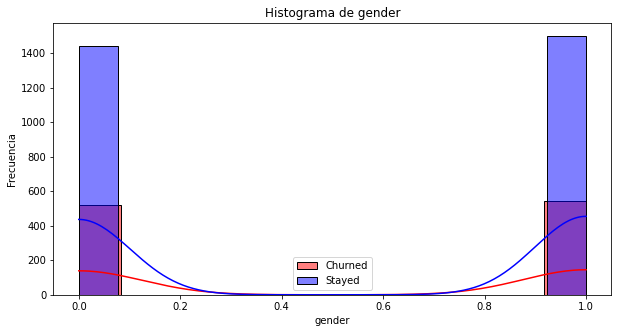

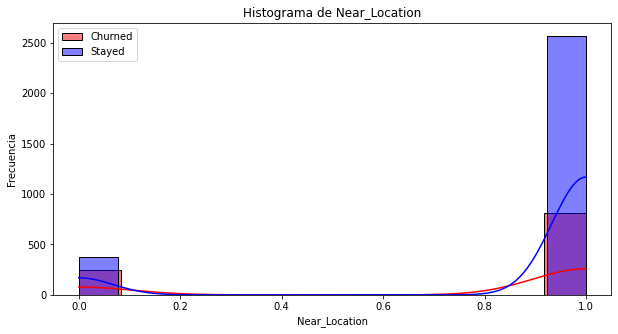

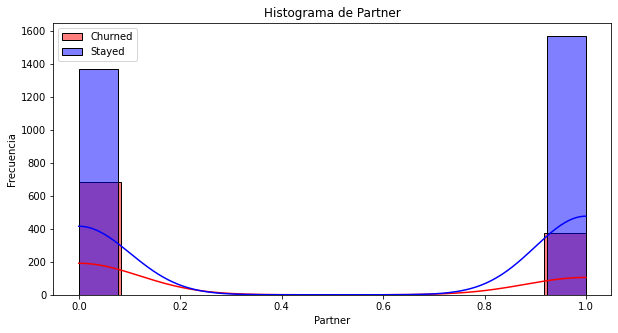

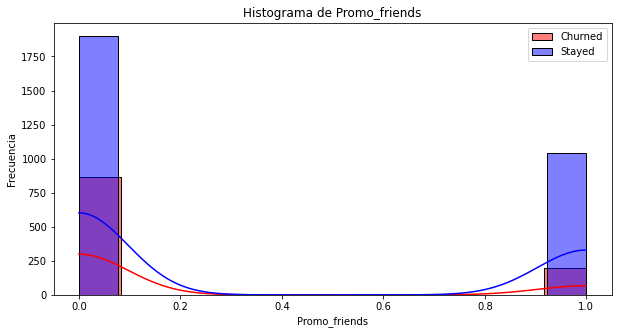

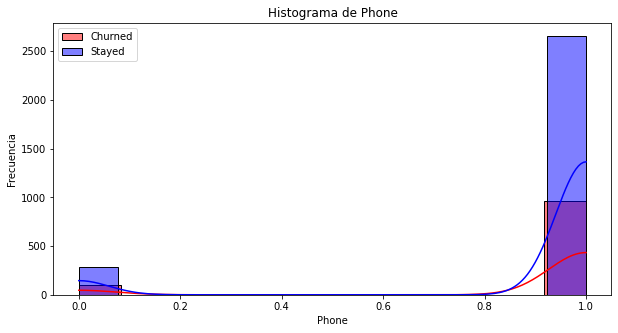

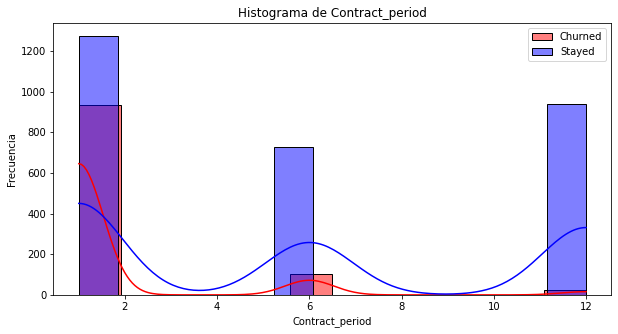

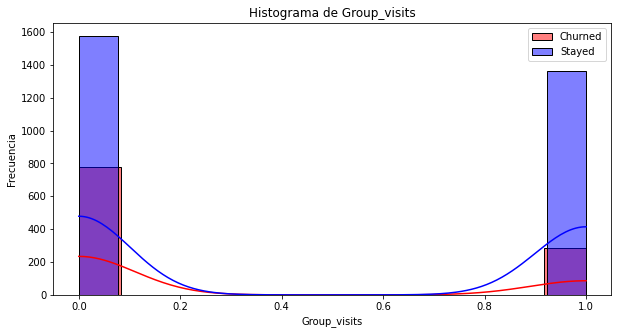

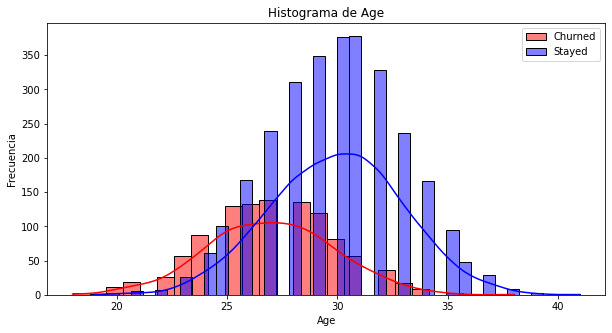

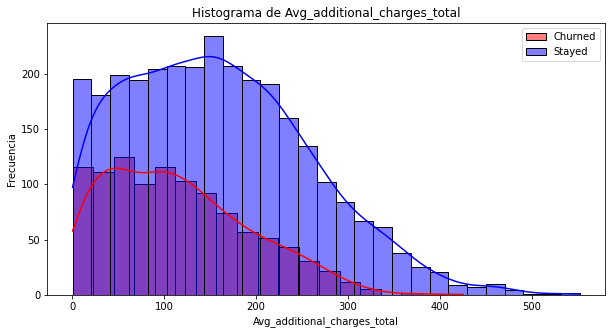

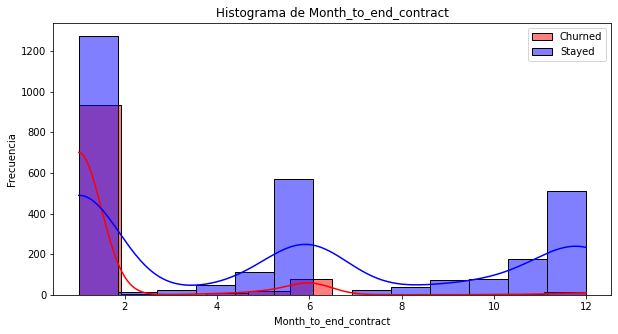

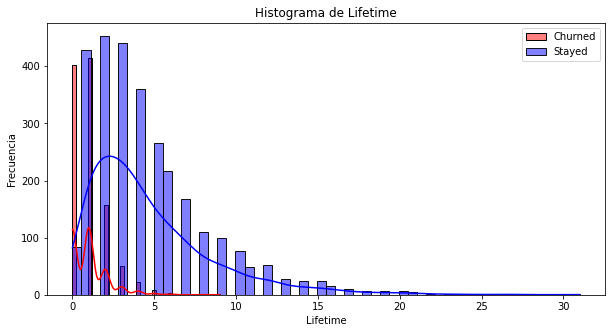

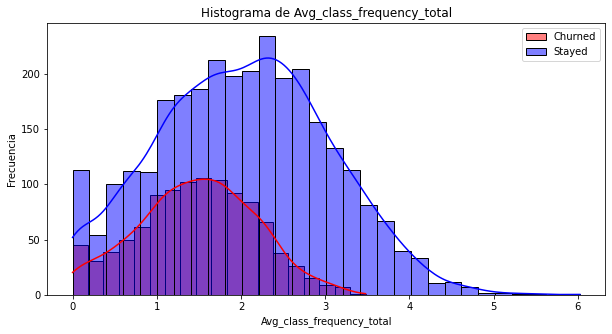

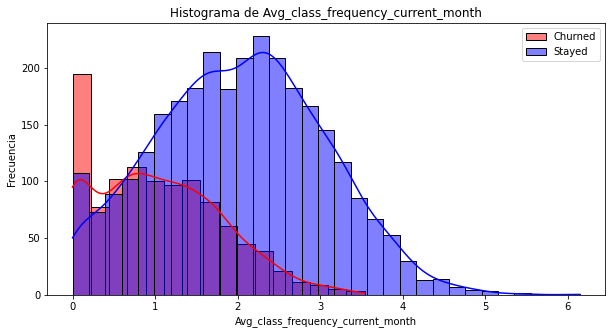

In [9]:
# histogramas de barras para cada característica
for x in caracteristica:
    plt.figure(figsize=(10, 5))
    sns.histplot(churned[x], color='red', alpha=0.5, label='Churned', kde=True)
    sns.histplot(stayed[x], color='blue', alpha=0.5, label='Stayed', kde=True)
    plt.title(f'Histograma de {x}')
    plt.xlabel(x)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Muy buen trabajo, con esta exploracion inicial de datos
</div>


### Crea una matriz de correlación y muéstrala.

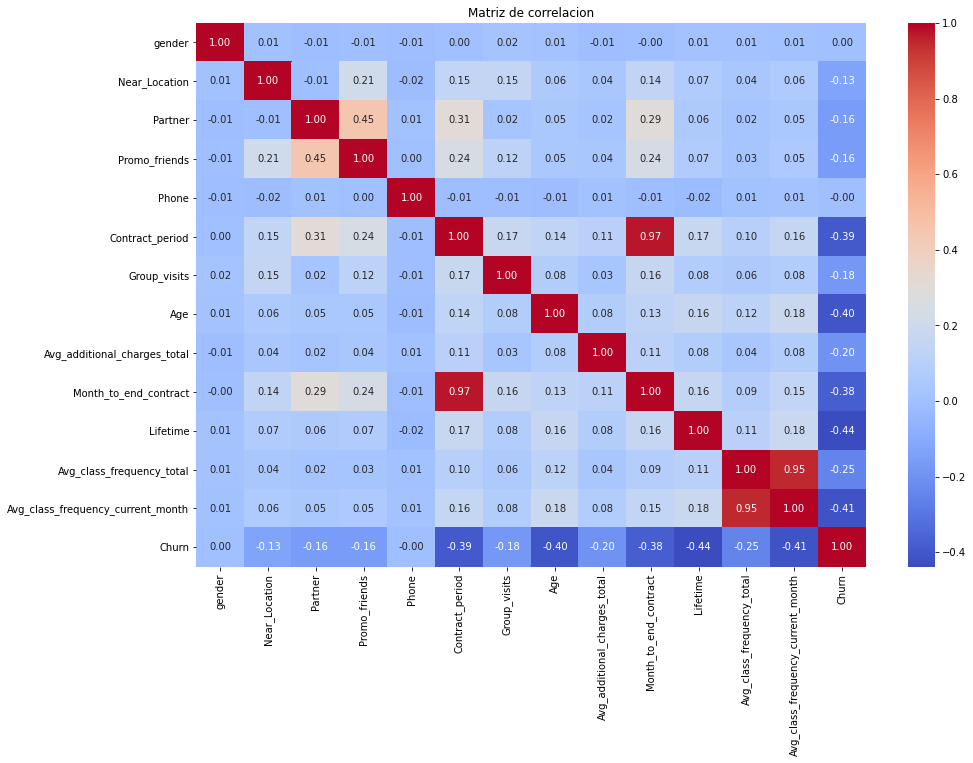

In [10]:
# matriz de correlación
correlation_matrix = data.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlacion')
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Cuando utilices la matriz debes indicar el resultado del analisis de las variables
</div>


## Construir un modelo para predecir la cancelación de usuarios


### Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
Entrena el modelo en el set de entrenamiento con dos métodos:

.-regresión logística;

.-bosque aleatorio.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Te dejo un ejemplo para que cambies la perspectiva del codigo

</div><div class="alert alert-block alert-info">
<b>Comentario del revisor</b> <a class="tocSkip"></a> X = data.drop('Churn', axis = 1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model = [LogisticRegression(random_state=0, max_iter=1000), RandomForestClassifier(random_state=0)]

</div>


In [11]:
X = data.drop(columns=['Churn'], axis=1)
y = data['Churn']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
# Crear el modelo de regresión logística
logistic_model = LogisticRegression()

# Entrenar el modelo con el conjunto de entrenamiento
logistic_model.fit(X_train, y_train)



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**NOTA: YA NO SE QUE HACER PARA QUE NO SALGA ESTE ERROR EN ESTE CODIGO**

In [14]:
# Crear el modelo de bosque aleatorio
random_forest_model = RandomForestClassifier()

# Entrenar el modelo con el conjunto de entrenamiento
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

### Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

In [15]:
# Prediccion de regresion logistica
logistic_predictions = logistic_model.predict(X_test)

# Prediccion de bosque aleatorio
random_forest_predictions = random_forest_model.predict(X_test)

# Calcular métricas para regresión logística
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)
logistic_roc = roc_auc_score(y_test, logistic_predictions)

# Calcular métricas para bosque aleatorio
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_roc = roc_auc_score(y_test, random_forest_predictions)   
        
print("Métricas para regresión logística:")
print("Exactitud:", logistic_accuracy)
print("Precisión:", logistic_precision)
print("Recall:", logistic_recall)
print('F1:', logistic_f1)
print('ROC_AUC:',logistic_roc)
print()

print("Métricas para bosque aleatorio:")
print("Exactitud:", random_forest_accuracy)
print("Precisión:", random_forest_precision)
print("Recall:", random_forest_recall)
print('F1:',random_forest_f1)
print('ROC_AUC:',random_forest_roc)

Métricas para regresión logística:
Exactitud: 0.9225
Precisión: 0.8655913978494624
Recall: 0.8131313131313131
F1: 0.8385416666666666
ROC_AUC: 0.8858015369643276

Métricas para bosque aleatorio:
Exactitud: 0.91
Precisión: 0.8315789473684211
Recall: 0.797979797979798
F1: 0.8144329896907218
ROC_AUC: 0.872411825900198


## Crear clústeres de usuarios/as

Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

### Estandariza los datos.

In [16]:
data_without_target = data.drop(columns=['Churn'], axis=1)

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_without_target)

# Convertir los datos estandarizados en un DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_without_target.columns)
scaled_df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0.979706,0.427881,1.026861,1.497161,-3.059852,0.289890,1.194032,-0.056554,-1.377531,0.161605,-0.193329,-1.911920,-1.678472
1,-1.020715,0.427881,-0.973842,-0.667931,0.326813,1.608822,1.194032,0.557327,-0.350213,1.831941,0.873680,0.045176,0.136014
2,-1.020715,0.427881,1.026861,-0.667931,0.326813,-0.809219,-0.837498,-0.363494,-0.181592,-0.792873,-0.460081,-0.020493,-0.029019
3,-1.020715,0.427881,1.026861,1.497161,0.326813,1.608822,1.194032,1.171208,-0.874722,1.831941,-0.460081,1.364655,1.510450
4,0.979706,0.427881,1.026861,1.497161,0.326813,-0.809219,-0.837498,-0.977375,0.533700,-0.792873,-0.193329,-0.787076,-0.614542


### Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

In [17]:
linkage_matrix = linkage(scaled_data, method='ward')
linkage_matrix

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

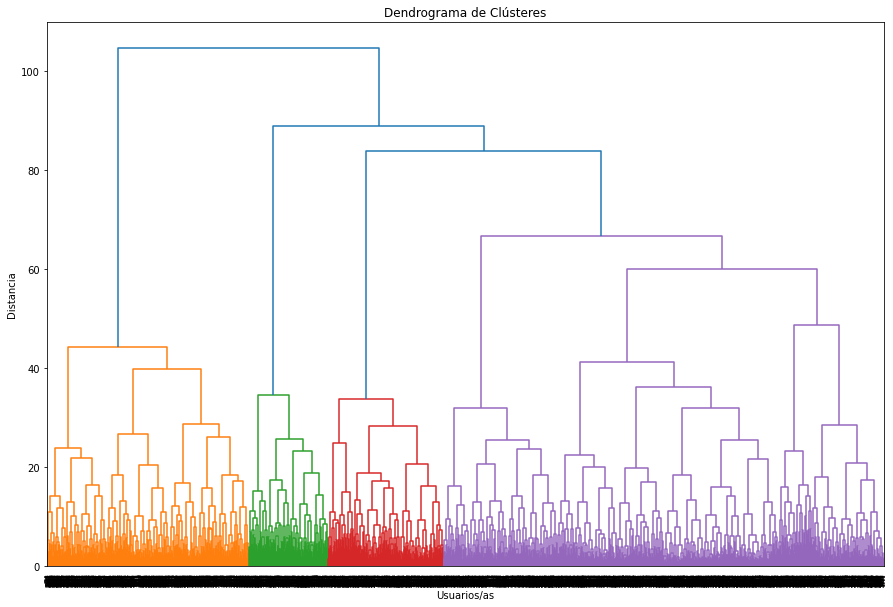

In [18]:
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix)
plt.title('Dendrograma de Clústeres')
plt.xlabel('Usuarios/as')
plt.ylabel('Distancia')
plt.show()

**El numero de cluster sugerido que podemos destacar corresponde a los 5 colores diferentes del gráfico.**

### Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [19]:
# Entrenar el modelo de clustering K-means
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(scaled_data)
data['cluster'] = clusters
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,3
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,1
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,2
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,1


**Asignamos un numero de prediccion, utilziando el metodo k-means, entre el el 0 y 4 para cada cliente en una nueva columna.**

### Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [20]:
# Calcular los valores medios de las características para cada clúster
cluster_means = data.groupby('cluster').mean()

# Mostrar los valores medios de las características para cada clúster
cluster_means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
1,0.484921,1.000000,0.350794,0.238095,1.000000,1.953968,0.341270,28.167460,131.516081,1.861905,2.431746,1.246646,1.011770,0.515079
2,0.503490,0.959123,0.782652,0.573280,1.000000,10.923230,0.546361,29.991027,160.881742,9.983051,4.748754,1.977676,1.970029,0.027916
3,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
4,0.559622,0.976387,0.360094,0.237308,0.998819,2.687131,0.469894,30.109799,161.594478,2.478158,4.890201,2.847678,2.846030,0.067296


### Traza distribuciones de características para los clústeres. ¿Notas algo?

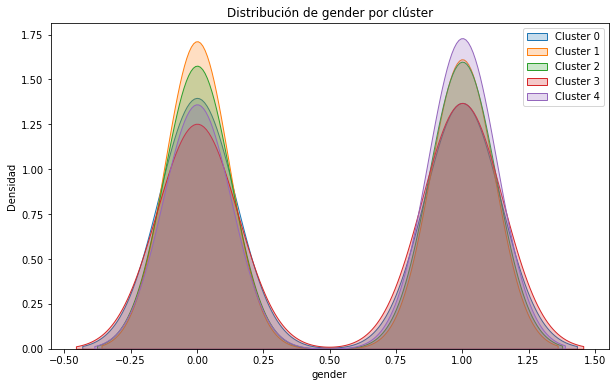

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


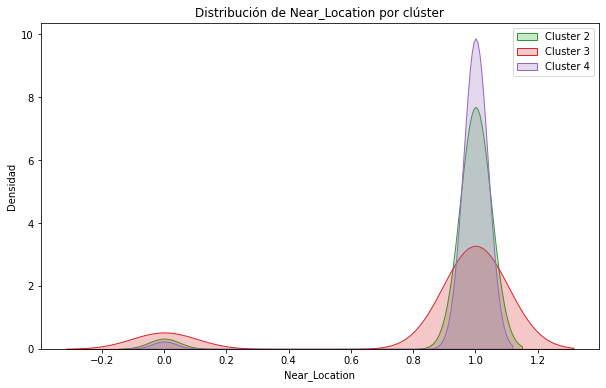

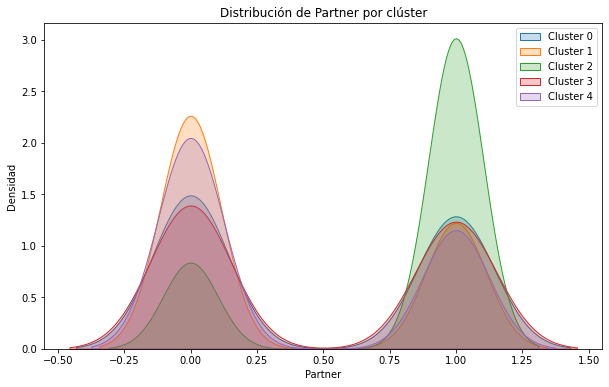

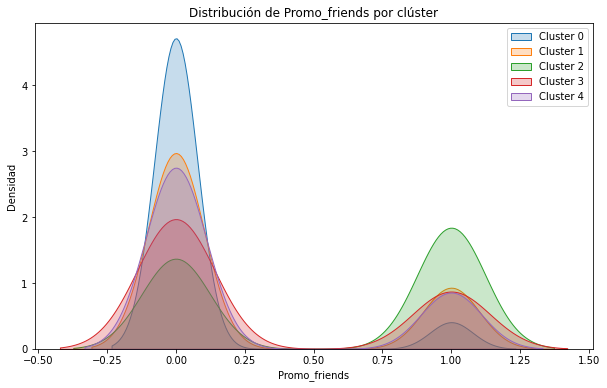

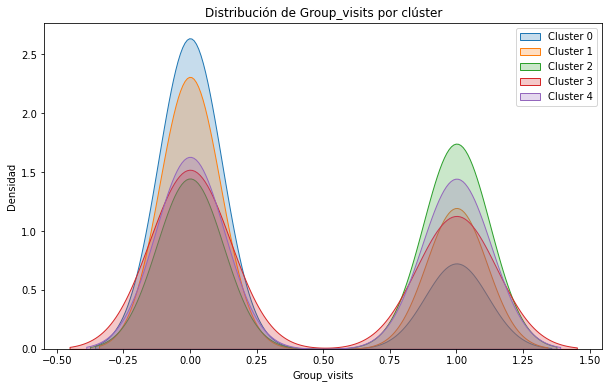

In [21]:
# Dividir el dataset en subconjuntos por clúster
cluster0 = data[data['cluster'] == 0]
cluster1 = data[data['cluster'] == 1]
cluster2 = data[data['cluster'] == 2]
cluster3 = data[data['cluster'] == 3]
cluster4 = data[data['cluster'] == 4]

# Definir las características que deseas visualizar
features_to_plot = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Group_visits']

# Trazar las distribuciones de las características para cada clúster
for caracteristica in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(cluster0[caracteristica], label='Cluster 0', shade=True)
    sns.kdeplot(cluster1[caracteristica], label='Cluster 1', shade=True)
    sns.kdeplot(cluster2[caracteristica], label='Cluster 2', shade=True)
    sns.kdeplot(cluster3[caracteristica], label='Cluster 3', shade=True)
    sns.kdeplot(cluster4[caracteristica], label='Cluster 4', shade=True)
    plt.title(f'Distribución de {caracteristica} por clúster')
    plt.xlabel(caracteristica)
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()

Para el grafico 'genero'podemos observar resultados realmente equitativos

Para el grafico 'Near_Location' podemos ver que para la mayoria de los grupos el usuario vive o trabaja en el vecindario donde se encuentra el gimnasio.

Para el grafico 'Parnert' obervamos ciertas variaciones en los grupos si los usuarios pertenecen o no a compañias asociadas.

Para el grafico 'Promo_Friends' podemos ver que para el grupo cluster 4 los usuarios se inscribieron mediante la oferta 'traer un amigo'
para el grafico 'Group_visits' observamos la variacion mas inclinada a 0 donde los usuarios no participan en sesiones grupales.

### Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [22]:
# Calcular la tasa de cancelación para cada clúster
cancellation_rate_by_cluster = data.groupby('cluster')['Churn'].mean().reset_index()

# Mostrar la tasa de cancelación para cada clúster
cancellation_rate_by_cluster

,cluster,Churn
0,0,0.443564
1,1,0.515079
2,2,0.027916
3,3,0.267532
4,4,0.067296


**Observando los resultados anteriores podemos ver que que todos los grupos a excepcion del 3 y 4 difieren en terminos de cancelacion, siendo el grupo 1 mas propenso a irse mientras que los mas leales son los del grupo 2.**

# Conclusion

Con los resultados obtenidos del analisis de clusteres y las tasas de cancelaciones podemos realziar las siguientes recomendaciones:

1.- Utilizar una segmentacion efectiva de clientes para adaptar las estrategias de marketing y retencion para cada uno de ellos ofreciendoles promociones o experiencias personalizadas.

2.- Identificar los clusteres con las tasas de cancelacion mas altas y desarrollar estrategias de retencion como por ejemplo ofrecerles descuentos especiales, incluirlos en programas de fidelizacion con el fin de mejorar la lealtad del cliente.

3.- Mejorar la experiencia del cliente tanto en el lugar donde se desarrolla la  actividad como en las plataformas de subscripcion, sitios web o redes sociales que utilice el cliente para llevar a cabo su organizacion diaria para asistir al Gimnasio, ofreciendo un servicio rapido y eficiente y respondiendo de manera personalizada.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Corrige el codigo para completar los comentarios finales
</div>
